In [170]:
#Needed packages
import os 
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread 
from skimage.transform import resize 
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


## Prepare some methods 

In [164]:
#Data generation from a given directory, categories and target image size
def data_generation(datadir,Categories,size):
    flat_data_arr=[]
    target_arr=[]
    for i in Categories:
        print(f'--loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(size,size,1))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')
    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)
    df=pd.DataFrame(flat_data)
    df['Target']=target
    return df

In [216]:
#Method to visualize the classifications results into a bar charte
def visulaise_results(model,x_test,y_test):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    y_pred=model.predict(x_test)
    #classification_report,accuracy_score,recall_score,f1_score,confusion_matrix
    scores = ['Accuracy', 'Precision', 'Recall', 'F1_score']
    values = [accuracy_score(y_pred,y_test)
              ,precision_score(y_pred,y_test,average='macro')
              ,recall_score(y_pred,y_test,average='macro')
              ,f1_score(y_pred,y_test,average='macro')]
    values = [round(float(v),2)*100 for v in values]
    ax.bar(scores,values)
    addlabels(scores,values)
    plt.title("Classification scores")
    plt.show()

In [227]:
#This method to predict result from an image by giving the image path and the model wanted
def predict_image(path,model):
    img=imread(path)
    plt.imshow(img)
    plt.show()
    img_resize=resize(img,(100,100,1))
    l=[img_resize.flatten()]
    probability=model2.predict_proba(l)
    for ind,val in enumerate(Categories):
        print(f'=> {val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+Categories[model2.predict(l)[0]])

## Start building and training the model

In [165]:
#Generate the dataset using the created method
datadir='brain_tumor/Training/'
Categories=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
size = 100 
df = data_generation(datadir,Categories,size)

--loading... category : glioma_tumor
loaded category:glioma_tumor successfully
--loading... category : meningioma_tumor
loaded category:meningioma_tumor successfully
--loading... category : no_tumor
loaded category:no_tumor successfully
--loading... category : pituitary_tumor
loaded category:pituitary_tumor successfully


In [167]:
#Dataset preview 
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.004157,0.007843,0.003922,0.003922,0.000235,0.000235,0.003922,0.000014,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.007843,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [213]:
#Split the generated dataset to test and train 
x=df.iloc[:,:-1] #Features 
y=df.iloc[:,-1]  #Classes 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
print('Dataset Splitted Successfully!')

Dataset Splitted Successfully!


### 1. First model RandomForest Classifier

In [246]:
#First model RandomForest Classifier 
model0=RandomForestClassifier(n_estimators=800)
model0.fit(x_train,y_train)

RandomForestClassifier(n_estimators=800)

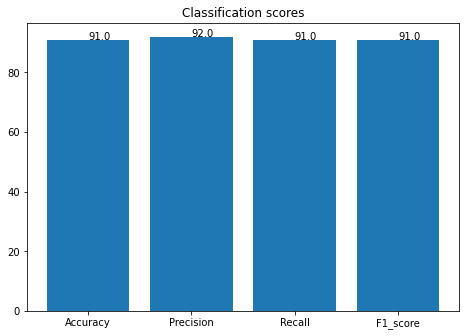

In [247]:
visulaise_results(model0,x_test,y_test)

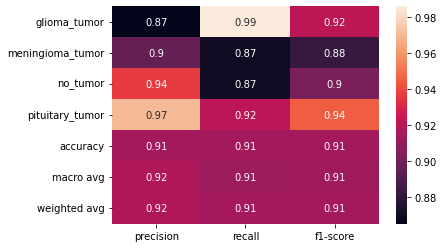

In [248]:
#Visualize the classifiaction report into a heatmap
y_pred=model0.predict(x_test)
clf_report = classification_report(y_pred,y_test,output_dict=True,labels=[0,1,2,3],target_names=Categories)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig('Model_0_Classification_report.png')

The confusion matrix:
[[143   1   0   1]
 [ 15 145   4   2]
 [  0  11  74   2]
 [  5   7   1 163]]


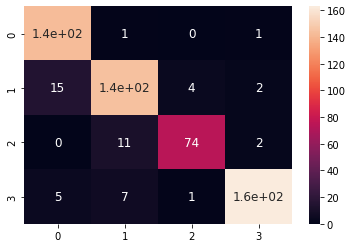

In [226]:
print('The confusion matrix:')
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,annot_kws={"size": 12})
plt.savefig('Model_0_confusion_matrix.png')

### 2. First model Extra Trees Classifier

In [261]:
model1 = ExtraTreesClassifier(n_estimators=800, max_depth=None, random_state=7)
model1.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=800, random_state=7)

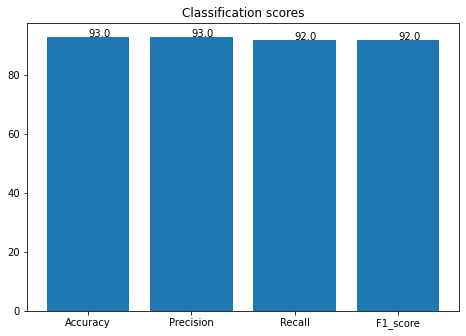

In [262]:
visulaise_results(model1,x_test,y_test)

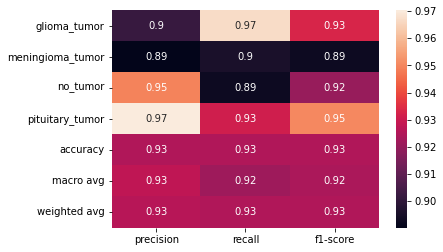

In [263]:
y_pred=model1.predict(x_test)
clf_report = classification_report(y_pred,y_test,output_dict=True,labels=[0,1,2,3],target_names=Categories)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig('Model_1_Classification_report.png')

The confusion matrix:
[[148   3   0   1]
 [ 11 147   3   2]
 [  0   7  75   2]
 [  4   7   1 163]]


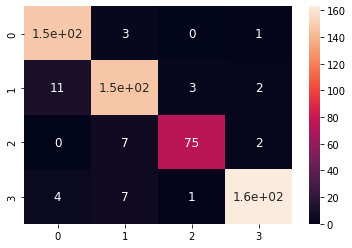

In [260]:
print('The confusion matrix:')
y_pred=model1.predict(x_test)
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,annot_kws={"size": 12})
plt.savefig('Model_1_confusion_matrix.png')

### 3. First model KNeighbors Classifier

In [236]:
model2=KNeighborsClassifier(n_neighbors=2,weights='distance')
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

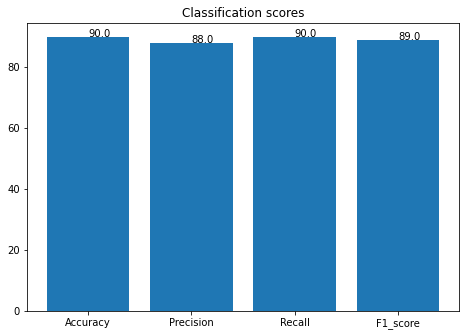

In [237]:
visulaise_results(model2,x_test,y_test)

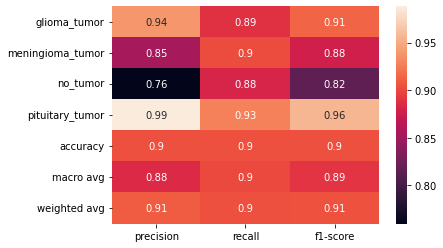

In [238]:
y_pred=model2.predict(x_test)
clf_report = classification_report(y_pred,y_test,output_dict=True,labels=[0,1,2,3],target_names=Categories)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig('Model_2_Classification_report.png')

The confusion matrix:
[[153  13   6   0]
 [  6 140   8   1]
 [  0   7  60   1]
 [  4   4   5 166]]


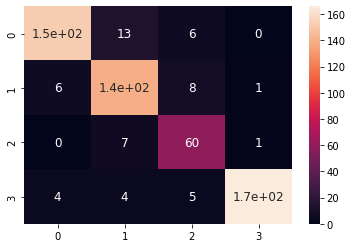

In [239]:
print('The confusion matrix:')
y_pred=model2.predict(x_test)
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,annot_kws={"size": 12})
plt.savefig('Model_3_confusion_matrix.png')

## Batch testing and User testing 

In [240]:
#Get all the test samples in the tests folder
from os import listdir
from os.path import isfile, join
test_images = [f for f in listdir('tests/') if isfile(join('tests/', f))]

In [241]:
test_images

['glioma1.jpg',
 'Glioma2.jpg',
 'Glioma3.jpg',
 'glioma5.jpg',
 'Gliomat1.jpg',
 'meningioma.jpg',
 'meningioma1.jpg',
 'meningioma2.jpg',
 'Normal1.jpg',
 'Normal2.jpg',
 'Pituitary1.jpg',
 'Pituitary2.jpg']

--------------------Testing_model0--------------------


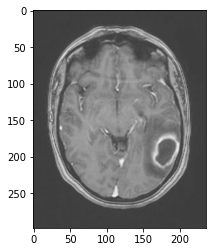

=> glioma_tumor = 0.0%
=> meningioma_tumor = 51.39752739491586%
=> no_tumor = 48.602472605084145%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


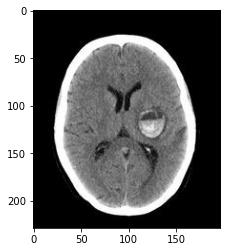

=> glioma_tumor = 0.0%
=> meningioma_tumor = 41.35039857422068%
=> no_tumor = 58.649601425779316%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


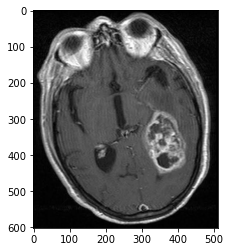

=> glioma_tumor = 0.0%
=> meningioma_tumor = 57.36865594280323%
=> no_tumor = 42.63134405719677%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


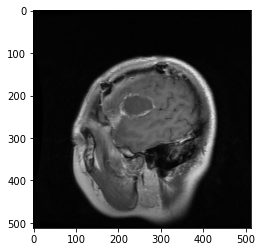

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


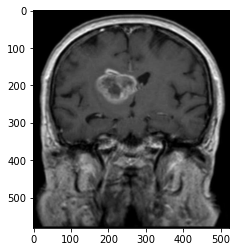

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : Gliomat
--------------------------------------------------
--------------------------------------------------


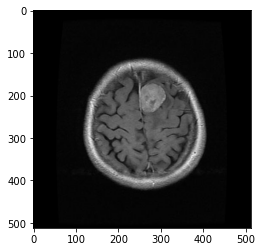

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningiom
--------------------------------------------------
--------------------------------------------------


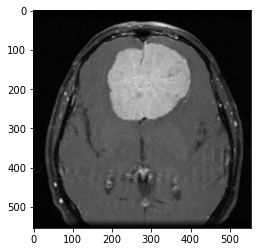

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


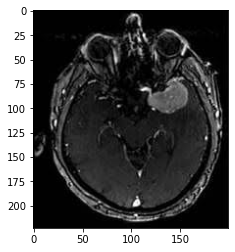

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


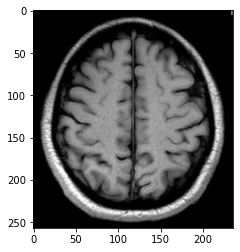

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


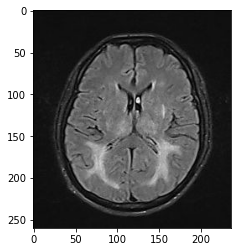

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


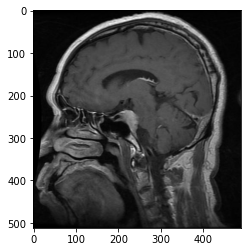

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


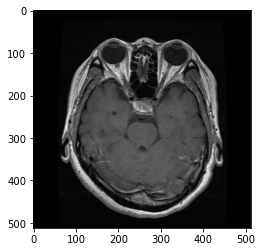

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


In [242]:
#Test all the samples in the test folder
print('-'*20+'Testing_model0'+'-'*20)
for i in test_images : 
    
    predict_image('tests/'+i,model0)
    print("Actual image is :",i.replace('.jpg','')[:-1])
    print('-'*50)
    print('-'*50)

--------------------Testing_model1--------------------


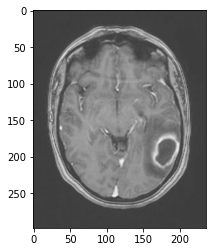

=> glioma_tumor = 0.0%
=> meningioma_tumor = 51.39752739491586%
=> no_tumor = 48.602472605084145%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


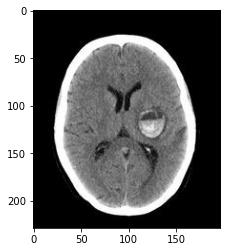

=> glioma_tumor = 0.0%
=> meningioma_tumor = 41.35039857422068%
=> no_tumor = 58.649601425779316%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


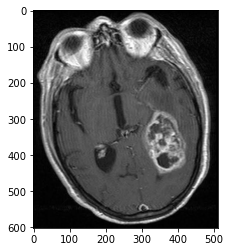

=> glioma_tumor = 0.0%
=> meningioma_tumor = 57.36865594280323%
=> no_tumor = 42.63134405719677%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


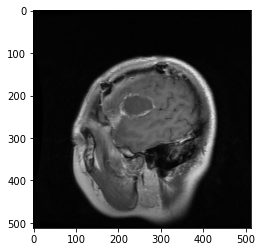

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


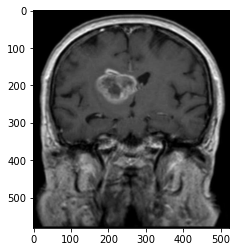

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : Gliomat
--------------------------------------------------
--------------------------------------------------


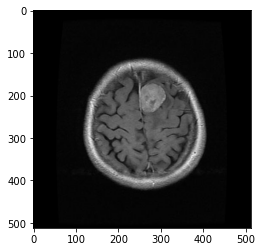

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningiom
--------------------------------------------------
--------------------------------------------------


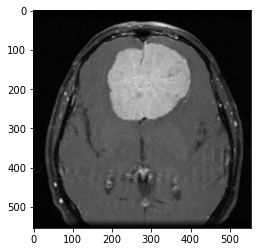

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


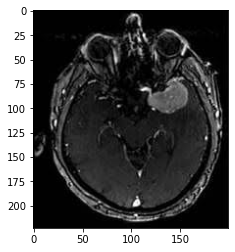

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


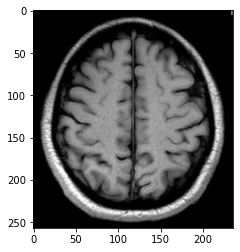

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


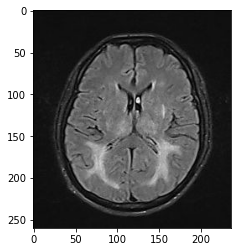

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


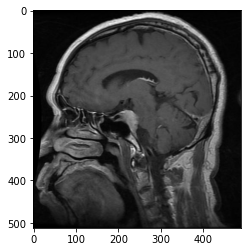

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


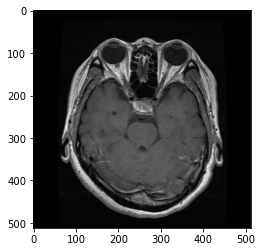

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


In [243]:
#Test all the samples in the test folder
print('-'*20+'Testing_model1'+'-'*20)
for i in test_images : 
    
    predict_image('tests/'+i,model1)
    print("Actual image is :",i.replace('.jpg','')[:-1])
    print('-'*50)
    print('-'*50)

--------------------Testing_model2--------------------


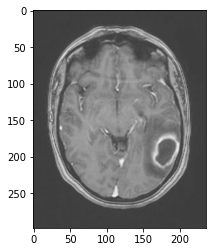

=> glioma_tumor = 0.0%
=> meningioma_tumor = 51.39752739491586%
=> no_tumor = 48.602472605084145%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


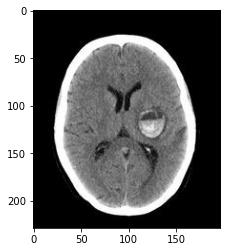

=> glioma_tumor = 0.0%
=> meningioma_tumor = 41.35039857422068%
=> no_tumor = 58.649601425779316%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


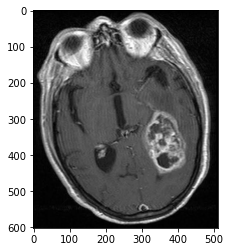

=> glioma_tumor = 0.0%
=> meningioma_tumor = 57.36865594280323%
=> no_tumor = 42.63134405719677%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : Glioma
--------------------------------------------------
--------------------------------------------------


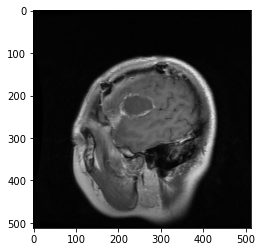

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : glioma
--------------------------------------------------
--------------------------------------------------


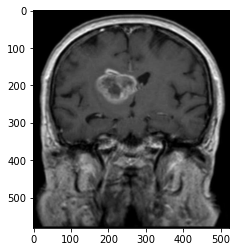

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor
Actual image is : Gliomat
--------------------------------------------------
--------------------------------------------------


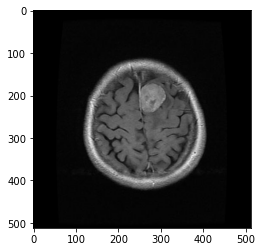

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningiom
--------------------------------------------------
--------------------------------------------------


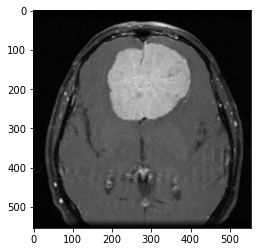

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


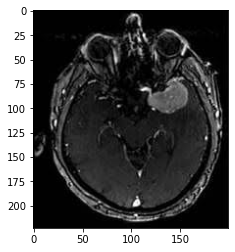

=> glioma_tumor = 0.0%
=> meningioma_tumor = 100.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : meningioma_tumor
Actual image is : meningioma
--------------------------------------------------
--------------------------------------------------


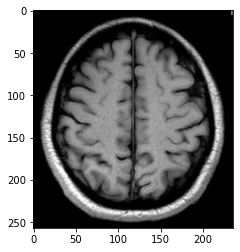

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


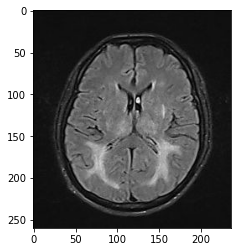

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 100.0%
=> pituitary_tumor = 0.0%
The predicted image is : no_tumor
Actual image is : Normal
--------------------------------------------------
--------------------------------------------------


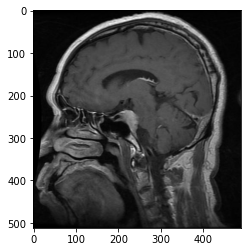

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


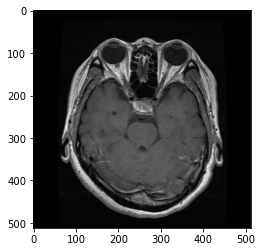

=> glioma_tumor = 0.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 100.0%
The predicted image is : pituitary_tumor
Actual image is : Pituitary
--------------------------------------------------
--------------------------------------------------


In [244]:
#Test all the samples in the test folder
print('-'*20+'Testing_model2'+'-'*20)
for i in test_images : 
    
    predict_image('tests/'+i,model2)
    print("Actual image is :",i.replace('.jpg','')[:-1])
    print('-'*50)
    print('-'*50)

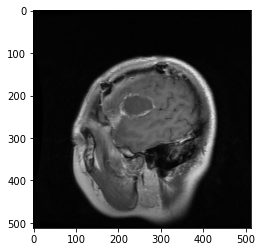

=> glioma_tumor = 100.0%
=> meningioma_tumor = 0.0%
=> no_tumor = 0.0%
=> pituitary_tumor = 0.0%
The predicted image is : glioma_tumor


In [245]:
#Predict using one image input 
predict_image("Tests/Glioma5.jpg",model1)